In [103]:
import numpy as np
import vtk
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph, position_color, highlight_color, component_color


%reload_ext autoreload
%autoreload 2

# Read in Data

In [104]:
crit = vtk.vtkXMLPolyDataReader()
crit.SetFileName('../data/critical_points1.vtp')
crit.Update()

sep = vtk.vtkXMLPolyDataReader()
sep.SetFileName('../data/separatrices1.vtp')
sep.Update()

seg = vtk.vtkXMLUnstructuredGridReader()
seg.SetFileName('../data/segmentation1.vtu')
seg.Update()

# Construct Morse Complex

In [105]:
mc = MorseComplex(crit.GetOutputPort(), sep.GetOutputPort(), seg.GetOutputPort())

# Construct Morse Graph

In [106]:
mg = MorseGraph.from_complex(mc)

In [107]:
simp_step = mg.simplify(min_length=15, mode='step')

simp_geo = mg.simplify(min_length=3, mode='geo_dist')

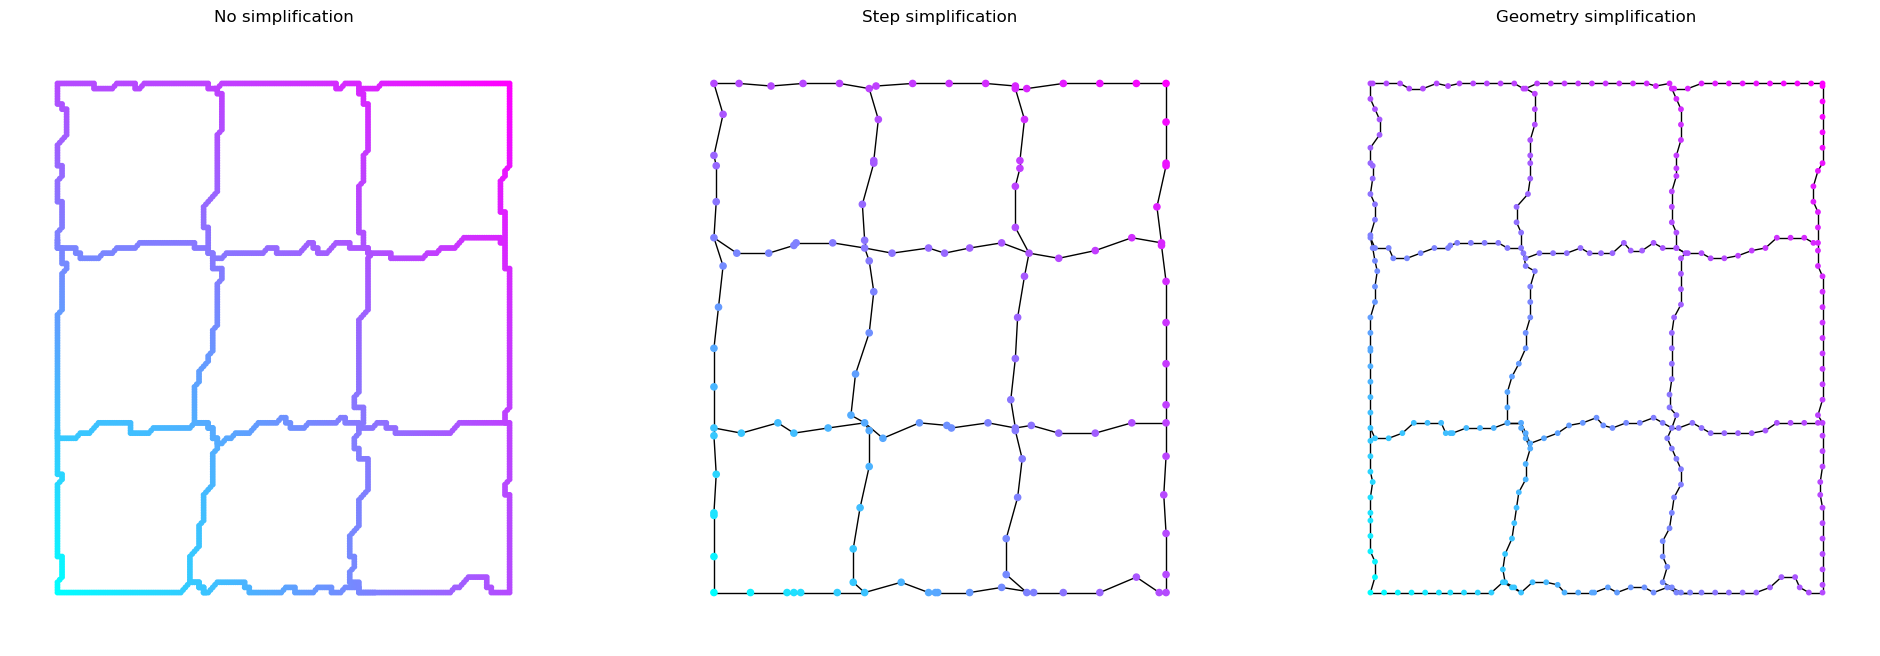

In [123]:
fig, axis = plt.subplots(1, 3, figsize=(24, 8))
cmap = 'cool'

mg.draw(ax=axis[0], cmap=cmap)
axis[0].set_title('No simplification')

simp_step.draw(ax=axis[1], node_size=20, cmap=cmap)
axis[1].set_title('Step simplification')

simp_geo.draw(ax=axis[2], cmap=cmap)
axis[2].set_title('Geometry simplification')

plt.show()
